In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [17]:
# some helper functions for the analysis

def rename_countries(x,country_names):
    for key,val in country_names.items():
        x.cntry.loc[x.cntry == key] = val


def return_ideos(x,cols,var):
    """
 Better to have the df in a tidy format 
    """
    ideo = x[cols]
    #ideo = ideo.loc[(ideo["país"] != "Italy") & (ideo["país"] != "Czech Republic")]
   
    return ideo







def create_validity_table(var,valid_var,column):

    """
Not all responses are valid. This fn prints a latex table to show that.
    """

    total_N = var[column].value_counts().rename("total_N")
    valid_N = valid_var[column].value_counts().rename("valid_N")

    validity_table = pd.concat([total_N, valid_N], axis = 1)
    validity_table["fraction_valid"] = validity_table.valid_N.div(validity_table.total_N, \
                                                                  axis = "index").round(2)
    #validity_table = validity_table.drop("valid_N",axis = 1)

    print(validity_table.to_latex())




def countries_plot(df,facet_col,map_val, year):

    """
All countries plot for a year of the ESS
    """

    sns.set(style="white", palette="muted", color_codes=True)


    g = (sns.FacetGrid(df,col = facet_col, col_wrap = 5)
         .map(sns.distplot, map_val,hist = False, kde_kws={"shade": True})
         .set_titles("{col_name}")
         .set_ylabels("Densidade")
         .set_xlabels("Posicionamento Esquerda-direita")
         .fig.subplots_adjust(hspace = 0.5))

    plt.suptitle("ESS {}- Posicionamento Político".format(year), y = 1.01)
    plt.savefig("ess_{}_plots.pdf".format(year), bbox_inches='tight',\
                pad_inches=0.2, dpi = 150)






In [6]:
# countries i'll plot

country_names = {"AT": "Áustria",  "BE": "Bélgica",  "CH": "Suíça", "CZ": "República Checa", "DE": "Alemanha" , "DK": "Dinamarca", "ES": "Espanha", "FI": "Finlândia", "FR": "França", "GB": "Reino Unido", "GR": "Grécia",  "HU": "Hungria", "IE": "Irlanda", "IL": "Israel", "IT": "Itália", "LU": "Luxemburgo", "NL": "Países Baixos", "NO": "Noruega", "PL": "Polônia", "PT": "Portugal", "SE": "Suécia", "SI": "Eslovênia"}


In [7]:
# loading the datasets

ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)

ess2004 = pd.read_stata("ESS_DATA/2004/ESS2e03_5.dta",convert_categoricals = False)

ess2006  = pd.read_stata("ESS_DATA/2006/ESS3e03_6.dta",convert_categoricals = False)

ess2008  = pd.read_stata("ESS_DATA/2008/ESS4e04_4.dta",convert_categoricals = False)

ess2010  = pd.read_stata("ESS_DATA/2010/ESS5e03_3.dta",convert_categoricals = False)

ess2012  = pd.read_stata("ESS_DATA/2012/ESS6e02_3.dta",convert_categoricals = False)

ess2014  = pd.read_stata("ESS_DATA/2014/ESS7e02_1.dta",convert_categoricals = False)

In [8]:
#renaming the datasets

dfs = [ ess2002, ess2004, ess2006, ess2008, ess2010, ess2012, ess2014]

for i in dfs:
    rename_countries(i,country_names)

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]



for i in dfs:
    print("{}".format(namestr(i,globals())), i["cntry"].unique(), len(i["cntry"].unique()), '\n')



/usr/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


['ess2002', 'i'] ['Áustria' 'Bélgica' 'Suíça' 'República Checa' 'Alemanha' 'Dinamarca'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'Hungria' 'Irlanda'
 'Israel' 'Itália' 'Luxemburgo' 'Países Baixos' 'Noruega' 'Polônia'
 'Portugal' 'Suécia' 'Eslovênia'] 22 

['ess2004', 'i'] ['Áustria' 'Bélgica' 'Suíça' 'República Checa' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'Hungria' 'Irlanda'
 'IS' 'Luxemburgo' 'Países Baixos' 'Noruega' 'Polônia' 'Portugal' 'Suécia'
 'Eslovênia' 'SK' 'TR' 'UA'] 25 

['ess2006', 'i'] ['Áustria' 'Bélgica' 'BG' 'Suíça' 'CY' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Hungria' 'Irlanda'
 'Países Baixos' 'Noruega' 'Polônia' 'Portugal' 'RU' 'Suécia' 'Eslovênia'
 'SK' 'UA'] 23 

['ess2008', 'i'] ['Bélgica' 'BG' 'Suíça' 'CY' 'República Checa' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'HR' 'Hungria'
 'Irlanda' 'Israel' 'LV' 'Países Baixos' 'Noruega' '

In [28]:
ideo_2002 = return_ideos(ess2002,["cntry", "essround", "lrscale"], "lrscale")


ideo_2004 = return_ideos(ess2004,["cntry", "essround", "lrscale"], "lrscale")


ideo_2006 = return_ideos(ess2006,["cntry", "essround", "lrscale"], "lrscale")


ideo_2008 = return_ideos(ess2008,["cntry", "essround", "lrscale"], "lrscale")

ideo_2010 = return_ideos(ess2010,["cntry", "essround", "lrscale"], "lrscale")


ideo_2012 = return_ideos(ess2012,["cntry", "essround", "lrscale"], "lrscale")


ideo_2014 = return_ideos(ess2014,["cntry", "essround", "lrscale"], "lrscale")




In [36]:
frames = [ideo_2002, ideo_2004, ideo_2006, ideo_2008, ideo_2010, ideo_2012, ideo_2014]

result = pd.concat(frames)

def return_valids(x,bound = 10 , var = "lrscale"):
    valid_ideo = x.loc[x[var]<=bound]
    return valid_ideo




alemanha_ideo = result.loc[result.cntry == "Alemanha"]

valid_alemanha_lrscale = alemanha_ideo.loc[alemanha_ideo["lrscale"] <= 10.0]

#alemanha_ideo["lrscale"].unique()
valid_alemanha_lrscale

          cntry  essround  lrscale
7556   Alemanha       1.0      8.0
7557   Alemanha       1.0      3.0
7558   Alemanha       1.0     10.0
7559   Alemanha       1.0      6.0
7560   Alemanha       1.0      8.0
7561   Alemanha       1.0      2.0
7562   Alemanha       1.0      5.0
7563   Alemanha       1.0      6.0
7564   Alemanha       1.0      3.0
7565   Alemanha       1.0      3.0
7566   Alemanha       1.0      7.0
7567   Alemanha       1.0      5.0
7568   Alemanha       1.0      7.0
7569   Alemanha       1.0      6.0
7570   Alemanha       1.0      6.0
7571   Alemanha       1.0      7.0
7572   Alemanha       1.0      5.0
7573   Alemanha       1.0      4.0
7574   Alemanha       1.0      3.0
7575   Alemanha       1.0      6.0
7577   Alemanha       1.0      6.0
7578   Alemanha       1.0      6.0
7579   Alemanha       1.0      8.0
7580   Alemanha       1.0      7.0
7581   Alemanha       1.0      7.0
7582   Alemanha       1.0      4.0
7583   Alemanha       1.0     10.0
7584   Alemanha     

In [20]:
ideo_2002

           cntry  essround  lrscale
0        Áustria       1.0      6.0
1        Áustria       1.0      6.0
2        Áustria       1.0      5.0
3        Áustria       1.0      5.0
4        Áustria       1.0      5.0
5        Áustria       1.0     88.0
6        Áustria       1.0     88.0
7        Áustria       1.0      6.0
8        Áustria       1.0      5.0
9        Áustria       1.0      5.0
10       Áustria       1.0      5.0
11       Áustria       1.0      5.0
12       Áustria       1.0     88.0
13       Áustria       1.0      4.0
14       Áustria       1.0      4.0
15       Áustria       1.0      8.0
16       Áustria       1.0     88.0
17       Áustria       1.0      7.0
18       Áustria       1.0     88.0
19       Áustria       1.0     88.0
20       Áustria       1.0      5.0
21       Áustria       1.0     88.0
22       Áustria       1.0     88.0
23       Áustria       1.0      6.0
24       Áustria       1.0      5.0
25       Áustria       1.0      4.0
26       Áustria       1.0  

In [38]:
#create_validity_table(ideo_2002,valid_ideo_2002,"país")

create_validity_table(ideo_2014,valid_ideo_2014,"país")

\begin{tabular}{lrrr}
\toprule
{} &  total\_N &  valid\_N &  fraction\_valid \\
\midrule
Alemanha      &     3045 &     2922 &            0.96 \\
Bélgica       &     1769 &     1697 &            0.96 \\
Dinamarca     &     1502 &     1445 &            0.96 \\
EE            &     2051 &     1725 &            0.84 \\
Eslovênia     &     1224 &      940 &            0.77 \\
Espanha       &     1925 &     1662 &            0.86 \\
Finlândia     &     2087 &     2004 &            0.96 \\
França        &     1917 &     1803 &            0.94 \\
Hungria       &     1698 &     1409 &            0.83 \\
Irlanda       &     2390 &     1932 &            0.81 \\
Israel        &     2562 &     2399 &            0.94 \\
LT            &     2250 &     1560 &            0.69 \\
Noruega       &     1436 &     1400 &            0.97 \\
Países Baixos &     1919 &     1791 &            0.93 \\
Polônia       &     1615 &     1309 &            0.81 \\
Portugal      &     1265 &     1101 &            0.87 \\

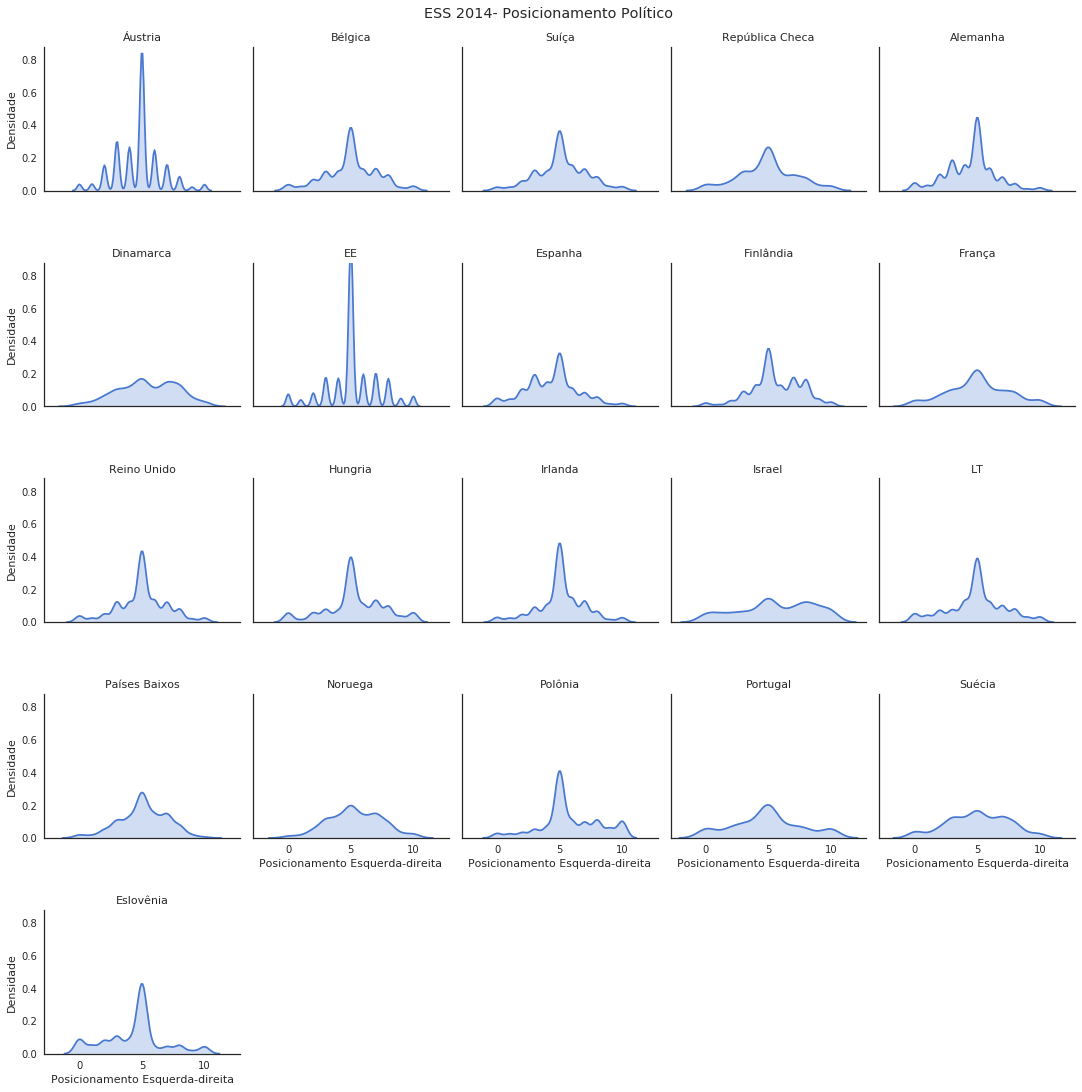

In [15]:
countries_plot(valid_ideo_2014,"país","lrscale",2014)
